**TP N°2**

In [ ]:
# instalamos librerias
# !pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

**Serie 1: Muestras Tomadas**

In [ ]:
# Load the data

df1 = pd.read_csv("/content/drive/MyDrive/AST TP2/df1.csv")
df1.head()

,ds,y
0,2021-11-25,7
1,2021-11-26,4
2,2021-11-27,0
3,2021-11-28,0
4,2021-11-29,0


In [ ]:
# Aca tenemos la columna df de fecha convertida a tipo datetime
# las columnas renombradas adecuadamente para ser utilizadas como entrada de modelo prophet .

df1.ds = pd.to_datetime(df1.ds)


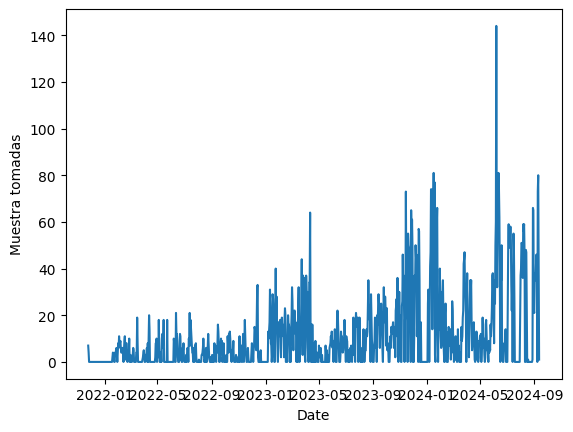

In [ ]:
plt.plot(df1['ds'], df1['y'])
plt.xlabel('Date')
plt.ylabel('Muestra tomadas')
plt.show()

In [ ]:
# Creamos un objeto Prophet y ajustamos a los datos.
model1 = Prophet()
model1.fit(df1) # usamos el método fit para ajustar el modelo a los datos

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/0v_l8vnu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/yoiafrcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62295', 'data', 'file=/tmp/tmpo6ngm8z8/0v_l8vnu.json', 'init=/tmp/tmpo6ngm8z8/yoiafrcz.json', 'output', 'file=/tmp/tmpo6ngm8z8/prophet_model36tok0a5/prophet_model-20250125143837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Crear un marco de datos futuro
# Asi podemos usar junto con el modelo ajustado para hacer predicciones.
future = model1.make_future_dataframe(periods=365)
future.tail()

,ds
1383,2025-09-08
1384,2025-09-09
1385,2025-09-10
1386,2025-09-11
1387,2025-09-12


In [ ]:
# Hacer predicciones para fechas futuras.
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1383,2025-09-08,37.740355,22.529027,54.100441
1384,2025-09-09,41.160374,25.025860,56.346751
1385,2025-09-10,42.991057,25.888587,60.992906
1386,2025-09-11,41.715925,26.119607,57.927121
1387,2025-09-12,40.528280,25.039671,55.886619


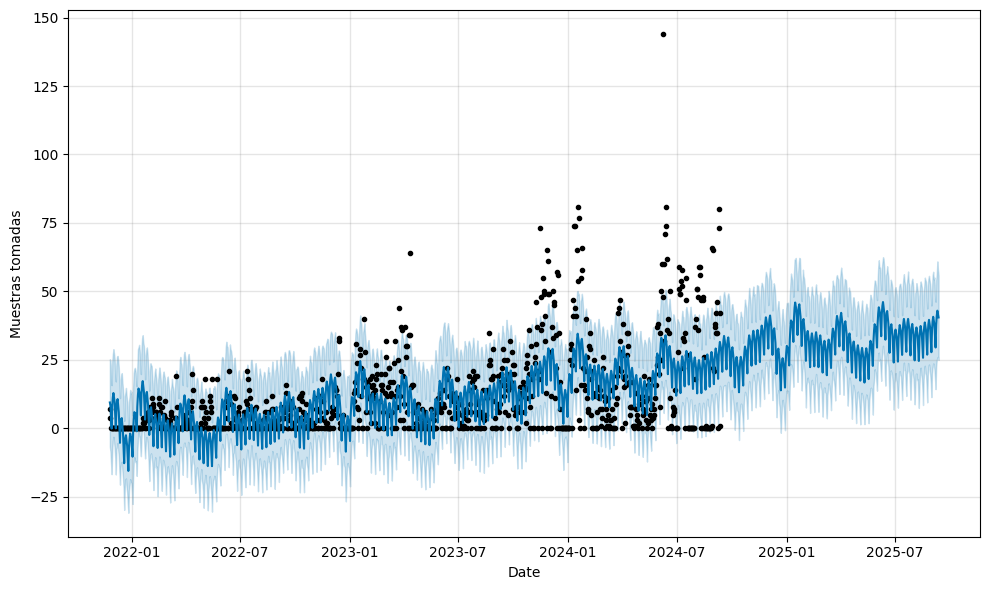

In [ ]:
# Visualiza las predicciones
model1.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Muestras tomadas')
plt.show()

El gráfico muestra los datos de muestras tomadas reales como puntos negros, los valores pronosticados como una línea azul y los intervalos de predicción como áreas sombreadas en azul.

In [ ]:
#Visualisación últimas fechas del df1

df1.tail()

,ds,y
1018,2024-09-08,0
1019,2024-09-09,73
1020,2024-09-10,80
1021,2024-09-11,42
1022,2024-09-12,1


In [ ]:
#Se toman 3 meses previos a la fecha final como corte entre train y future (12-06-2024)

In [ ]:
future = df1[df1.ds > '2024-06-12'] # nuevo dataFrame "future" que tiene las filas de df donde el valor en la columna ds es posterior al 12-06-2024.
train = df1[df1.ds <= '2024-06-12'] # nuevo dataframe "train" que tiene las filas de df donde el valor en la columna ds es el 12-06-2024 o anterior.

In [ ]:
train.head()

,ds,y
0,2021-11-25,7
1,2021-11-26,4
2,2021-11-27,0
3,2021-11-28,0
4,2021-11-29,0


In [ ]:
future.head()

,ds,y
931,2024-06-13,74
932,2024-06-14,62
933,2024-06-15,36
934,2024-06-16,0
935,2024-06-17,40


In [ ]:
#Prophet también permite incorporar regresores adicionales en el modelo.
#Los regresores son variables externas que pueden influir en la serie temporal. La inclusión de regresores en el modelo puede mejorar la precisión de los pronósticos
# al capturar los efectos de estas variables externas en las series temporales.
#En el caso de este df, no se cuenta con variables adicionales para incorporarlas como regresores.

In [ ]:
# Aqui prophet se ajusta usando los datos de entrenamiento

model1 = Prophet()
model1.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/t10_c3xi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/171oksnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19382', 'data', 'file=/tmp/tmpo6ngm8z8/t10_c3xi.json', 'init=/tmp/tmpo6ngm8z8/171oksnk.json', 'output', 'file=/tmp/tmpo6ngm8z8/prophet_modelr5ql77nw/prophet_model-20250125143841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Hacer predicciones para fechas futuras.
forecast1 = model1.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2024-09-08,14.718623,0.445981,29.496170
88,2024-09-09,22.003640,7.859732,36.179064
89,2024-09-10,24.897876,10.254103,37.807082
90,2024-09-11,26.358147,12.246842,41.175346
91,2024-09-12,24.573638,10.608070,38.263422


In [ ]:
#serie original
future.tail()

,ds,y
1018,2024-09-08,0
1019,2024-09-09,73
1020,2024-09-10,80
1021,2024-09-11,42
1022,2024-09-12,1


In [ ]:
# serie proyectada
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2024-09-08,14.718623,0.445981,29.496170
88,2024-09-09,22.003640,7.859732,36.179064
89,2024-09-10,24.897876,10.254103,37.807082
90,2024-09-11,26.358147,12.246842,41.175346
91,2024-09-12,24.573638,10.608070,38.263422


<ipython-input-19-21a910a412b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)


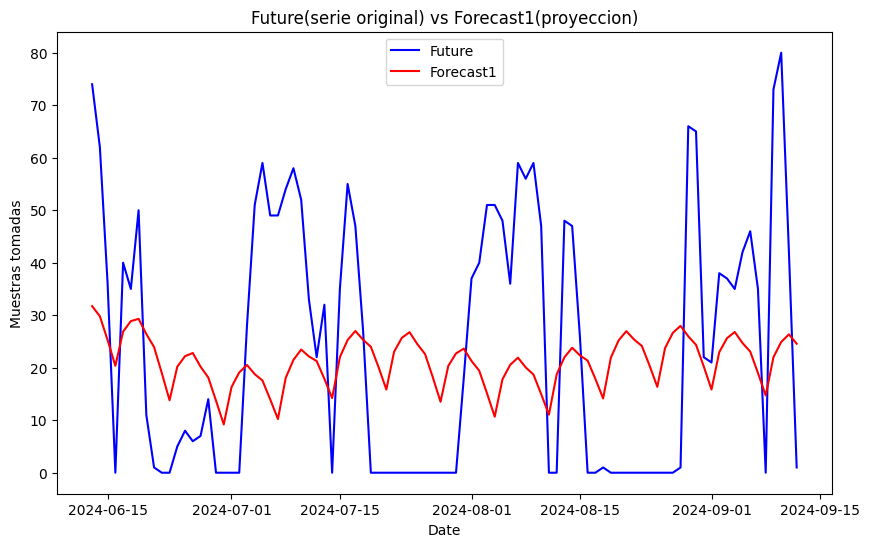

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Convertir la columna 'ds' a objetos datetime con zona horaria explícita
future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)
forecast1['ds'] = pd.to_datetime(forecast1['ds']).dt.tz_localize(None)

plt.plot(future['ds'], future['y'], label='Future', color='blue')
plt.plot(forecast1['ds'], forecast1['yhat'], label='Forecast1', color='red')

plt.xlabel('Date')
plt.ylabel('Muestras tomadas')
plt.title('Future(serie original) vs Forecast1(proyeccion)')
plt.legend()

# Mostrar el gráfico
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, mse, rmse, mape

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast1['yhat']  # Predicciones de la serie forecast1 ('yhat' es la predicción puntual)

mae, mse, rmse, mape = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")



Métricas de pronóstico versus futuro:
MAE: 21.48154449071096
MSE: 583.5712202773274
RMSE: 24.157218802613173
MAPE: nan


**Serie 2: Muestras Devueltas**

In [ ]:
# Load the data
df2 = pd.read_csv("/content/drive/MyDrive/AST TP2/df2.csv")
df2.head()

,ds,y
0,2021-11-25,0
1,2021-11-26,0
2,2021-11-27,0
3,2021-11-28,0
4,2021-11-29,0


In [ ]:
# Aca tenemos la columna df de fecha convertida a tipo datetime
# las columnas renombradas adecuadamente para ser utilizadas como entrada de modelo prophet .

df2.ds= pd.to_datetime(df2.ds)


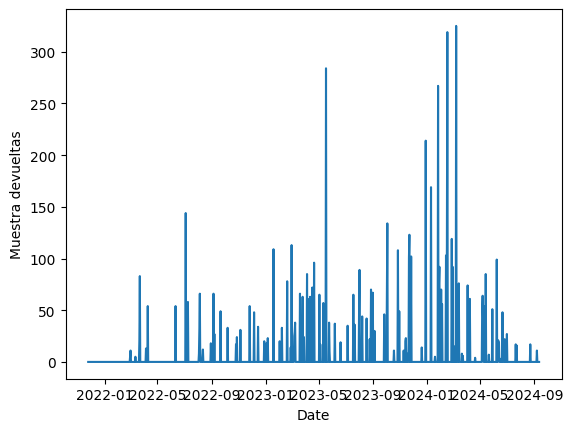

In [ ]:
plt.plot(df2['ds'], df2['y'])
plt.xlabel('Date')
plt.ylabel('Muestra devueltas')
plt.show()

In [ ]:
# Creamos un objeto Prophet y ajustamos a los datos.
model2 = Prophet()
model2.fit(df2) # usamos el método fit para ajustar el modelo a los datos

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/tit96763.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/_c4s930j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17191', 'data', 'file=/tmp/tmpo6ngm8z8/tit96763.json', 'init=/tmp/tmpo6ngm8z8/_c4s930j.json', 'output', 'file=/tmp/tmpo6ngm8z8/prophet_modelfy1vqksx/prophet_model-20250125143853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Crear un marco de datos futuro
# Asi podemos usar junto con el modelo ajustado para hacer predicciones.
future = model2.make_future_dataframe(periods=365)
future.tail()

,ds
1383,2025-09-08
1384,2025-09-09
1385,2025-09-10
1386,2025-09-11
1387,2025-09-12


In [ ]:
# Hacer predicciones para fechas futuras.
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1383,2025-09-08,-5.357460,-41.463237,28.326017
1384,2025-09-09,-5.269757,-41.362721,30.166028
1385,2025-09-10,-2.727434,-38.380681,32.297298
1386,2025-09-11,-4.562793,-38.154900,29.371318
1387,2025-09-12,-5.273085,-38.953450,24.799206


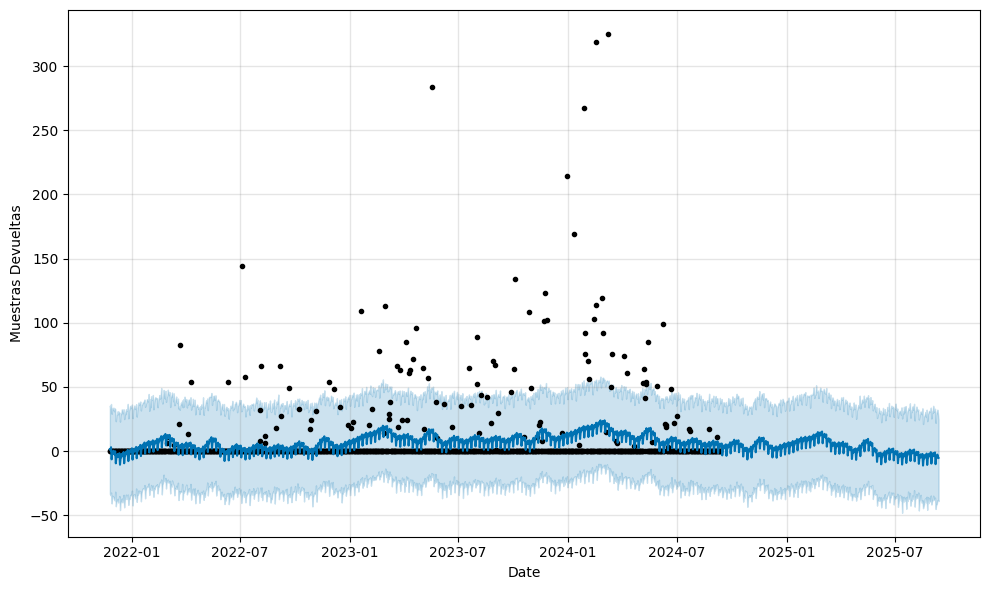

In [ ]:
# Visualiza las predicciones
model2.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Muestras Devueltas')
plt.show()

El gráfico muestra los datos de muestras devueltas reales como puntos negros, los valores pronosticados como una línea azul y los intervalos de predicción como áreas sombreadas en azul.

In [ ]:
#Visualisación últimas fechas del df2

df2.tail()

,ds,y
1018,2024-09-08,0
1019,2024-09-09,0
1020,2024-09-10,0
1021,2024-09-11,0
1022,2024-09-12,0


In [ ]:
#Se toman 3 meses previos a la fecha final como corte entre train y future (12-06-2024)

In [ ]:
future = df2[df2.ds > '2024-06-12'] # nuevo dataFrame "future" que tiene las filas de df donde el valor en la columna ds es posterior al 12-06-2024.
train = df2[df2.ds <= '2024-06-12'] # nuevo dataframe "train" que tiene las filas de df donde el valor en la columna ds es el 12-06-2024 o anterior.

In [ ]:
train.head()

,ds,y
0,2021-11-25,0
1,2021-11-26,0
2,2021-11-27,0
3,2021-11-28,0
4,2021-11-29,0


In [ ]:
future.head()

,ds,y
931,2024-06-13,19
932,2024-06-14,0
933,2024-06-15,0
934,2024-06-16,0
935,2024-06-17,3


In [ ]:
#Prophet también permite incorporar regresores adicionales en el modelo.
#Los regresores son variables externas que pueden influir en la serie temporal. La inclusión de regresores en el modelo puede mejorar la precisión de los pronósticos
# al capturar los efectos de estas variables externas en las series temporales.
#En el caso de este df, no se cuenta con variables adicionales para incorporarlas como regresores.

In [ ]:
# Aqui prophet se ajusta usando los datos de entrenamiento

model2 = Prophet()
model2.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/tcaelllm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/9gjgxq1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47215', 'data', 'file=/tmp/tmpo6ngm8z8/tcaelllm.json', 'init=/tmp/tmpo6ngm8z8/9gjgxq1a.json', 'output', 'file=/tmp/tmpo6ngm8z8/prophet_modellz_sfrro/prophet_model-20250125143854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Hacer predicciones para fechas futuras.
forecast2 = model2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2024-09-08,9.633782,-26.176818,46.128575
88,2024-09-09,14.831872,-19.580215,50.170881
89,2024-09-10,15.006808,-19.535139,49.070973
90,2024-09-11,17.726321,-16.776709,54.968809
91,2024-09-12,15.802288,-19.491342,51.423170


In [ ]:
#serie original
future.tail()

,ds,y
1018,2024-09-08,0
1019,2024-09-09,0
1020,2024-09-10,0
1021,2024-09-11,0
1022,2024-09-12,0


In [ ]:
# serie proyectada
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2024-09-08,9.633782,-26.176818,46.128575
88,2024-09-09,14.831872,-19.580215,50.170881
89,2024-09-10,15.006808,-19.535139,49.070973
90,2024-09-11,17.726321,-16.776709,54.968809
91,2024-09-12,15.802288,-19.491342,51.423170


<ipython-input-38-0e023018e01b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)


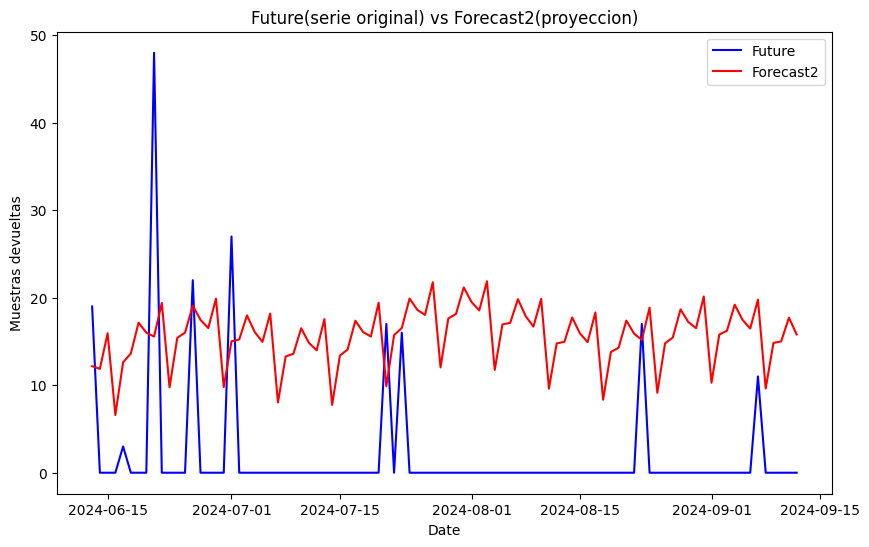

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Convertir la columna 'ds' a objetos datetime con zona horaria explícita
future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)
forecast2['ds'] = pd.to_datetime(forecast2['ds']).dt.tz_localize(None)

plt.plot(future['ds'], future['y'], label='Future', color='blue')
plt.plot(forecast2['ds'], forecast2['yhat'], label='Forecast2', color='red')

plt.xlabel('Date')
plt.ylabel('Muestras devueltas')
plt.title('Future(serie original) vs Forecast2(proyeccion)')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, mse, rmse, mape

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast2['yhat']  # Predicciones de la serie forecast2 ('yhat' es la predicción puntual)

mae, mse, rmse, mape = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")



Métricas de pronóstico versus futuro:
MAE: 15.106116140796226
MSE: 249.93600492085898
RMSE: 15.80936446922706
MAPE: nan


**Serie 3: Muestras en Espera**

In [ ]:
# Load the data
df3 = pd.read_csv("/content/drive/MyDrive/AST TP2/df3.csv")
df3.head()

,ds,y
0,2021-11-25,7
1,2021-11-26,11
2,2021-11-27,11
3,2021-11-28,11
4,2021-11-29,11


In [ ]:
# Aca tenemos la columna df de fecha convertida a tipo datetime
# las columnas renombradas adecuadamente para ser utilizadas como entrada de modelo prophet .

df3.ds= pd.to_datetime(df3.ds)

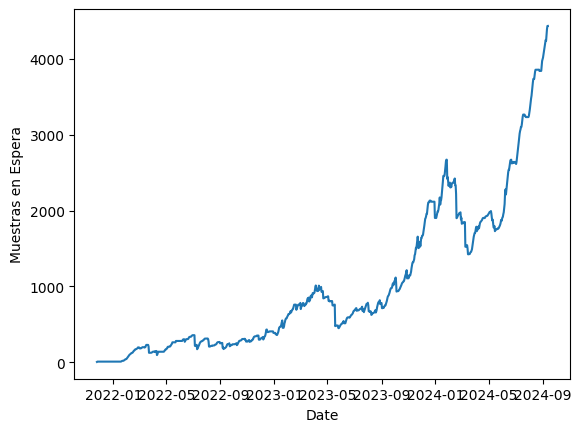

In [ ]:
plt.plot(df3['ds'], df3['y'])
plt.xlabel('Date')
plt.ylabel('Muestras en Espera')
plt.show()

In [ ]:
# Creamos un objeto Prophet y ajustamos a los datos.
model3 = Prophet()
model3.fit(df3) # usamos el método fit para ajustar el modelo a los datos

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/6p4ufeis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/po20ozkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7863', 'data', 'file=/tmp/tmpo6ngm8z8/6p4ufeis.json', 'init=/tmp/tmpo6ngm8z8/po20ozkf.json', 'output', 'file=/tmp/tmpo6ngm8z8/prophet_modelu3fnms4r/prophet_model-20250125143856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Crear un marco de datos futuro
# Asi podemos usar junto con el modelo ajustado para hacer predicciones.
future = model3.make_future_dataframe(periods=365)
future.tail()

,ds
1383,2025-09-08
1384,2025-09-09
1385,2025-09-10
1386,2025-09-11
1387,2025-09-12


In [ ]:
# Hacer predicciones para fechas futuras.
forecast = model3.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1383,2025-09-08,9341.308892,3428.048585,14681.221004
1384,2025-09-09,9367.009791,3401.527092,14749.974707
1385,2025-09-10,9394.135778,3425.440538,14824.493771
1386,2025-09-11,9418.623583,3428.631928,14906.549943
1387,2025-09-12,9441.400411,3356.368993,14822.894714


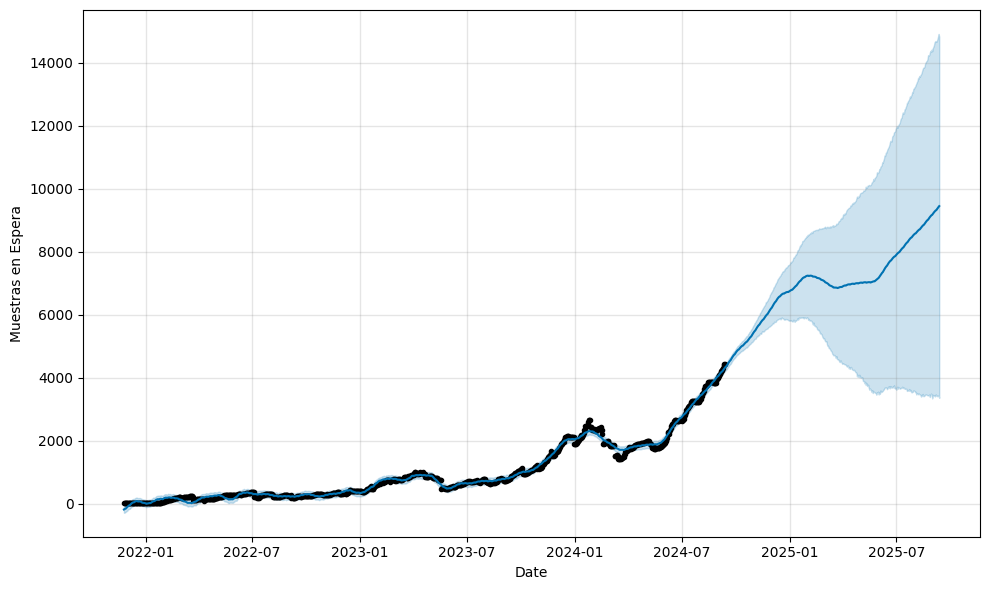

In [ ]:
# Visualiza las predicciones
model3.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Muestras en Espera')
plt.show()

El gráfico muestra los datos de muestras devueltas reales como puntos negros, los valores pronosticados como una línea azul y los intervalos de predicción como áreas sombreadas en azul.

In [ ]:
#Visualisación últimas fechas del df3

df3.tail()

,ds,y
1018,2024-09-08,4234
1019,2024-09-09,4307
1020,2024-09-10,4387
1021,2024-09-11,4429
1022,2024-09-12,4430


In [ ]:
#Se toman 1 meses previos a la fecha final como corte entre train y future (12-08-2024)

In [ ]:
future = df3[df3.ds > '2024-08-12'] # nuevo dataFrame "future" que tiene las filas de df donde el valor en la columna ds es posterior al 12-08-2024.
train = df3[df3.ds <= '2024-08-12'] # nuevo dataframe "train" que tiene las filas de df donde el valor en la columna ds es el 12-08-2024 o anterior.

In [ ]:
train.head()

,ds,y
0,2021-11-25,7
1,2021-11-26,11
2,2021-11-27,11
3,2021-11-28,11
4,2021-11-29,11


In [ ]:
future.head()

,ds,y
992,2024-08-13,3780
993,2024-08-14,3827
994,2024-08-15,3853
995,2024-08-16,3853
996,2024-08-17,3853


In [ ]:
#Prophet también permite incorporar regresores adicionales en el modelo.
#Los regresores son variables externas que pueden influir en la serie temporal. La inclusión de regresores en el modelo puede mejorar la precisión de los pronósticos
# al capturar los efectos de estas variables externas en las series temporales.
#En el caso de este df, no se cuenta con variables adicionales para incorporarlas como regresores.

In [ ]:
# Aqui prophet se ajusta usando los datos de entrenamiento

model3 = Prophet()
model3.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/71ykjffu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6ngm8z8/a24xdq0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26290', 'data', 'file=/tmp/tmpo6ngm8z8/71ykjffu.json', 'init=/tmp/tmpo6ngm8z8/a24xdq0x.json', 'output', 'file=/tmp/tmpo6ngm8z8/prophet_modelgjxke7gg/prophet_model-20250125143858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Hacer predicciones para fechas futuras.
forecast3 = model3.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26,2024-09-08,3951.496491,3810.465378,4098.833205
27,2024-09-09,3974.345910,3829.203222,4128.223602
28,2024-09-10,3993.515322,3857.240827,4145.422562
29,2024-09-11,4016.298867,3876.434784,4163.873336
30,2024-09-12,4036.634123,3878.651793,4195.711044


In [ ]:
#serie original
future.tail()

,ds,y
1018,2024-09-08,4234
1019,2024-09-09,4307
1020,2024-09-10,4387
1021,2024-09-11,4429
1022,2024-09-12,4430


In [ ]:
# serie proyectada
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26,2024-09-08,3951.496491,3810.465378,4098.833205
27,2024-09-09,3974.345910,3829.203222,4128.223602
28,2024-09-10,3993.515322,3857.240827,4145.422562
29,2024-09-11,4016.298867,3876.434784,4163.873336
30,2024-09-12,4036.634123,3878.651793,4195.711044


<ipython-input-57-e103f093c38d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)


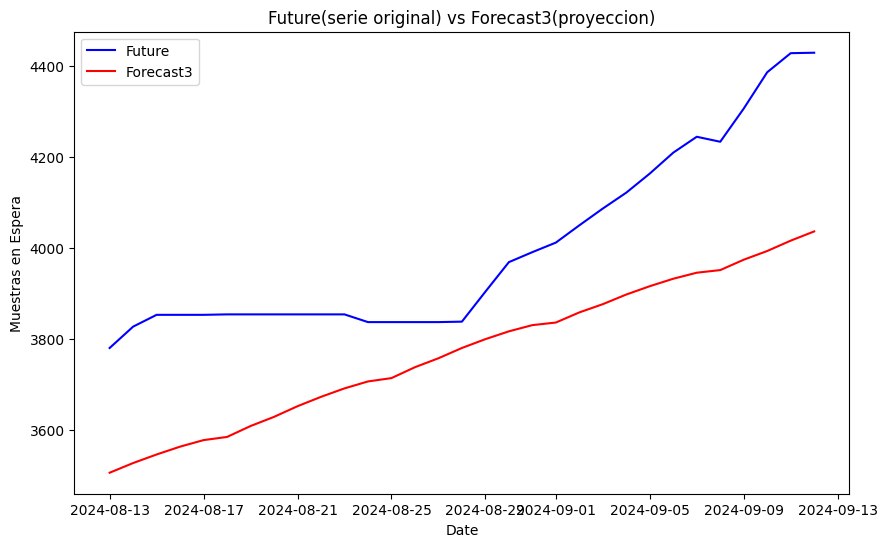

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Convertir la columna 'ds' a objetos datetime con zona horaria explícita
future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)
forecast3['ds'] = pd.to_datetime(forecast3['ds']).dt.tz_localize(None)

plt.plot(future['ds'], future['y'], label='Future', color='blue')
plt.plot(forecast3['ds'], forecast3['yhat'], label='Forecast3', color='red')

plt.xlabel('Date')
plt.ylabel('Muestras en Espera')
plt.title('Future(serie original) vs Forecast3(proyeccion)')
plt.legend()

# Mostrar el gráfico
plt.show()


De acuerdo a las características exponenicales de la serie, se reduce el intervalo de future para dar mas peso a los últimos meses de train (hasta agsto de 2024)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, mse, rmse, mape

y_true = future['y']  # Valores reales de la serie original
y_pred = forecast3['yhat']  # Predicciones de la serie forecast1 ('yhat' es la predicción puntual)

mae, mse, rmse, mape = evaluate_forecast(y_true, y_pred)

# Mostrar resultados
print(f"Métricas de pronóstico versus futuro:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")



Métricas de pronóstico versus futuro:
MAE: 228.58684346166268
MSE: 60557.05575762175
RMSE: 246.08343251349072
MAPE: nan
